<h4><center>DATS 6202, Fall 2018</center></h4>
<h1><center>Indicators of Heart Disease: A Comparison of Machine Learning Tools</center></h1>
<h4><center>Group 11:  Hilary Ligon</center></h4>
<h4><center>24 November 2018</center></h4>

## Overview
- Apply machine learning classification techniques on a dataset of heart disease patients from the 1980s in Switzerland, Hungary, and the United States (Long Beach, CA veterans) (http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease), described in the codebook here: (http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)


- The major sections of this project are:
    - Preprocessing
    - Fitting and Analyzing Models
        - logistic regression
        - multilayer perceptron
        - decicion tree
        - random forest
        - support vector machine
    - Ideas for Model Improvement

### Data Preprocessing

In [1]:
# Load packages for analysis
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Features to keep
features = ['Age','Sex','BPRest','Chol','FBS','Smoke','Cigs','SmokeYrs','ECGRest','Num']

#### Load Data

Data are available from the UCI websites listed below.  Data rows wrap onto multiple lines so that each sample inclues multiple new lines.  For that reason, it was simpler to turn the data into comma delimited files manually.  Because the UCI website was not working properly at some times, this file format ensured access to the data as well.

Switzerland:  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data

Hungary:  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data

Long Beach VA:  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data

In [3]:
# Load data from Switzerland
df1 = pd.read_csv('switzerland.csv', header=None)
df1.columns = ['id','D1','Age','Sex','PainLoc','PainExer','RelRest','PNCaden','CP','BPRest','HTN','Chol','Smoke','Cigs','SmokeYrs','FBS','FamDiabetes','FamCoronary','ECGRest','Month','Day','Year','Dig','BetaBlock','Nitr','CalcBlock','Diuretic','Protocol','ExerMin','STDep','Mets','MaxHeart','RestHeart','PeakBPS','PeakBPD','D2','RestBPD','Angina','D3','D4','D5','D6','D7','CA','D8','D9','D10','D11','D12','D13','Thal','D14','D15','D16','CathMonth','CathDay','CathYear','Num','LMT','LadProx','LadDist','Diag','CXMain','Ramus','OM1','OM2','RCaProx','RCaDist','D17','D18','D19','D20','D21','D22','D23','D24']
# Keep features of interest
df1 = df1[features]
# Mark null values
df1.replace(-9, np.NaN, inplace=True)

In [4]:
# Drop columns for number of cigarettes and years smoking because lots of the data is null and features are not essential.
df1 = df1.drop(columns=['Cigs','SmokeYrs'])
df1.head()

,Age,Sex,BPRest,Chol,FBS,Smoke,ECGRest,Num
0,65,1,115.0,0,0.0,NaN,0.0,1
1,32,1,95.0,0,NaN,1.0,0.0,1
2,61,1,105.0,0,NaN,NaN,0.0,1
3,50,1,145.0,0,NaN,NaN,0.0,1
4,57,1,110.0,0,NaN,NaN,1.0,3


In [5]:
# Load data from Hungary
df2 = pd.read_csv('hungary.csv', header=None)
df2.columns = ['id','D1','Age','Sex','PainLoc','PainExer','RelRest','PNCaden','CP','BPRest','HTN','Chol','Smoke','Cigs','SmokeYrs','FBS','FamDiabetes','FamCoronary','ECGRest','Month','Day','Year','Dig','BetaBlock','Nitr','CalcBlock','Diuretic','Protocol','ExerMin','STDep','Mets','MaxHeart','RestHeart','PeakBPS','PeakBPD','D2','RestBPD','Angina','D3','D4','D5','D6','D7','CA','D8','D9','D10','D11','D12','D13','Thal','D14','D15','D16','CathMonth','CathDay','CathYear','Num','LMT','LadProx','LadDist','Diag','CXMain','Ramus','OM1','OM2','RCaProx','RCaDist','D17','D18','D19','D20','D21','D22','D23','D24']
# Keep features of interest
df2 = df2[features]
# Mark null values
df2.replace(-9, np.NaN, inplace=True)

In [6]:
# Drop columns for number of cigarettes and years smoking because lots of the data is null and features are not essential.
df2 = df2.drop(columns=['Cigs','SmokeYrs'])
df2.head()

,Age,Sex,BPRest,Chol,FBS,Smoke,ECGRest,Num
0,40,1,140.0,289.0,0.0,NaN,0.0,0
1,49,0,160.0,180.0,0.0,NaN,0.0,1
2,37,1,130.0,283.0,0.0,NaN,1.0,0
3,48,0,138.0,214.0,0.0,NaN,0.0,3
4,54,1,150.0,NaN,0.0,NaN,0.0,0


In [7]:
# Load data from Long Beach, CA VA Hospital
df3 = pd.read_csv('long beach va.csv', header=None)
df3.columns = ['id','D1','Age','Sex','PainLoc','PainExer','RelRest','PNCaden','CP','BPRest','HTN','Chol','Smoke','Cigs','SmokeYrs','FBS','FamDiabetes','FamCoronary','ECGRest','Month','Day','Year','Dig','BetaBlock','Nitr','CalcBlock','Diuretic','Protocol','ExerMin','STDep','Mets','MaxHeart','RestHeart','PeakBPS','PeakBPD','D2','RestBPD','Angina','D3','D4','D5','D6','D7','CA','D8','D9','D10','D11','D12','D13','Thal','D14','D15','D16','CathMonth','CathDay','CathYear','Num','LMT','LadProx','LadDist','Diag','CXMain','Ramus','OM1','OM2','RCaProx','RCaDist','D17','D18','D19','D20','D21','D22','D23','D24']
# Keep features of interest
df3 = df3[features]
# Mark null values
df3.replace(-9, np.NaN, inplace=True)

In [8]:
# Drop columns for number of cigarettes and years smoking because features are not essential or included in other datasets.
df3 = df3.drop(columns=['Cigs','SmokeYrs'])
df3.head()

,Age,Sex,BPRest,Chol,FBS,Smoke,ECGRest,Num
0,63,1,140.0,260.0,0.0,0.0,1,2
1,44,1,130.0,209.0,0.0,0.0,1,0
2,60,1,132.0,218.0,0.0,1.0,1,2
3,55,1,142.0,228.0,0.0,1.0,1,1
4,66,1,110.0,213.0,1.0,0.0,2,0


#### Deal with Missing Data

##### What data is missing?

In [9]:
print('Switzerland data length is: ' + str(len(df1)))
print(' ')
print('null values:')
print(df1.isnull().sum(axis=0).tolist())

Switzerland data length is: 123
 
null values:
[0, 0, 2, 0, 75, 100, 1, 0]


In [10]:
print('Hungary data length is: ' + str(len(df2)))
print(' ')
print('null values:')
print(df2.isnull().sum(axis=0).tolist())

Hungary data length is: 294
 
null values:
[0, 0, 1, 23, 8, 282, 1, 0]


In [11]:
print('United States data length is: ' + str(len(df3)))
print(' ')
print('null values:')
print(df3.isnull().sum(axis=0).tolist())

United States data length is: 200
 
null values:
[0, 0, 56, 7, 7, 5, 0, 0]


##### Discussion:
The features for diabetes (FBS - i.e., fasting blood sugar) and smoker are full of nulls, but they are known risk factors for heart disease, so we do not want to drop them from the analysis.

To solve this problem, we are going to impute values.  First, we will impute missing values for the features where there are only a few missing values.  Then, we will use the cleaned up data to run a logistic regression model and predict the values for FBS and Smoke.  If we did not know that FBS and Smoke were important, we would simply drop all the rows with missing data and move on, but we do know better, so let's get started.

##### Impute missing data when only a few rows are missing

In [12]:
# For Switzerland data

In [13]:
# Determine mode of ECGRest
print((df1['ECGRest'] == 1).sum())
print((df1['ECGRest'] == 0).sum())

30
85


In [14]:
# Impute mean BPRest
meanval = df1['BPRest'].mean()
df1['BPRest'].fillna(value=meanval, inplace=True)

# Impute mode for ECGRest, which is 0
df1['ECGRest'].fillna(value=0, inplace=True)

In [15]:
print('Switzerland data length is: ' + str(len(df1)))
print(' ')
print('null values:')
print(df1.isnull().sum(axis=0).tolist())

Switzerland data length is: 123
 
null values:
[0, 0, 0, 0, 75, 100, 0, 0]


In [16]:
# For Hungary data

In [17]:
# Determine mode of ECGRest
print((df2['ECGRest'] == 1).sum())
print((df2['ECGRest'] == 0).sum())

52
235


In [18]:
# Impute mean BPRest
meanval = df2['BPRest'].mean()
df2['BPRest'].fillna(value=meanval, inplace=True)

# Impute mean Chol
meanval = df2['Chol'].mean()
df2['Chol'].fillna(value=meanval, inplace=True)

# Impute mode for ECGRest, which is 0
df2['ECGRest'].fillna(value=0, inplace=True)

In [19]:
print('Hungary data length is: ' + str(len(df2)))
print(' ')
print('null values:')
print(df2.isnull().sum(axis=0).tolist())

Hungary data length is: 294
 
null values:
[0, 0, 0, 0, 8, 282, 0, 0]


In [20]:
# For United States

In [21]:
# Impute mean BPRest
meanval = df3['BPRest'].mean()
df3['BPRest'].fillna(value=meanval, inplace=True)

# Impute mean Chol
meanval = df3['Chol'].mean()
df3['Chol'].fillna(value=meanval, inplace=True)

In [22]:
print('United States data length is: ' + str(len(df3)))
print(' ')
print('null values:')
print(df3.isnull().sum(axis=0).tolist())

United States data length is: 200
 
null values:
[0, 0, 0, 0, 7, 5, 0, 0]


##### Impute missing data for diabetes and smoking

In [23]:
# Use the U.S. data that includes information about smoking and diabetes to imput data for rest of dataset

In [24]:
# Delete rows with missing values because we will not be able to impute these since this is our training set
df4=df3
print('Number of rows before removing rows with missing values: ' + str(df4.shape[0]))
df4.dropna(how='any', inplace=True) #Drop all rows that have a NaN in any variable
print('Number of rows after removing rows with missing values: ' + str(df4.shape[0]))

Number of rows before removing rows with missing values: 200
Number of rows after removing rows with missing values: 188


In [25]:
# Create features and target for a logistic model on American data where Smoke is the target and then where FBS is the target
x1 = df4.drop(columns=['FBS','Smoke','Num'])
y11 = df4['Smoke']
y12 = df4['FBS']

In [26]:
# Create features and target for Hungary data
x2 = df2.drop(columns=['FBS','Smoke','Num'])
y21 = df2['Smoke']
y22 = df2['FBS']

In [27]:
# Create features and target for Switzerland data
x3 = df1.drop(columns=['FBS','Smoke','Num'])
y31 = df1['Smoke']
y32 = df1['FBS']

In [28]:
# Use U.S. data to determine best logstic model for Smoke

In [29]:
# Divide data into training and testing sets
# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(x1, y11, test_size=0.3, random_state=0, stratify=y11)

In [30]:
# Standardize the features
# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

In [31]:
# The list of value for hyperparameter C (penalty parameter)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# The list of choices for hyperparameter solver
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# The list of [score, setting]
score_settings = []

# For each C
for C in Cs:
    # For each solver
    for solver in solvers:
        # Declare the classifier with hyperparameter C, solver, and random_state
        clf2 = LogisticRegression(C=C, solver=solver, random_state=0)

        # Fit the classifier
        clf2.fit(X_train, y_train)

        # Get the score (rounding to two decimal places)
        score = round(clf2.score(X_test, y_test), 2)
        
        # Get the setting, which is a pair of (C, solver)
        setting = [C, solver]

        # Append [score, setting] to score_settings
        score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('solver: ' + score_settings[0][1][1])

The list of [score, setting] is:
[0.6, [0.001, 'liblinear']]
[0.58, [0.0001, 'liblinear']]
[0.56, [0.01, 'newton-cg']]
[0.56, [0.01, 'lbfgs']]
[0.56, [0.01, 'liblinear']]
[0.56, [0.01, 'sag']]
[0.56, [0.01, 'saga']]
[0.49, [0.0001, 'newton-cg']]
[0.49, [0.0001, 'lbfgs']]
[0.49, [0.0001, 'sag']]
[0.49, [0.0001, 'saga']]
[0.49, [0.001, 'newton-cg']]
[0.49, [0.001, 'lbfgs']]
[0.49, [0.001, 'sag']]
[0.49, [0.001, 'saga']]
[0.49, [0.1, 'newton-cg']]
[0.49, [0.1, 'lbfgs']]
[0.49, [0.1, 'liblinear']]
[0.49, [0.1, 'sag']]
[0.49, [0.1, 'saga']]
[0.47, [1, 'newton-cg']]
[0.47, [1, 'lbfgs']]
[0.47, [1, 'liblinear']]
[0.47, [1, 'sag']]
[0.47, [1, 'saga']]
[0.47, [10, 'newton-cg']]
[0.47, [10, 'lbfgs']]
[0.47, [10, 'liblinear']]
[0.47, [10, 'sag']]
[0.47, [10, 'saga']]
[0.47, [100, 'newton-cg']]
[0.47, [100, 'lbfgs']]
[0.47, [100, 'liblinear']]
[0.47, [100, 'sag']]
[0.47, [100, 'saga']]
[0.47, [1000, 'newton-cg']]
[0.47, [1000, 'lbfgs']]
[0.47, [1000, 'liblinear']]
[0.47, [1000, 'sag']]
[0.47, [100

In [32]:
# Now, use this information to declare the classifier for Hungary and Switzerland based on U.S. data for Smoke

In [33]:
# Declare the classifier for Smoke
clf_smoke = LogisticRegression(random_state=0, C=0.001, solver='liblinear')

# Fit the classifier
clf_smoke.fit(x1, y11)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# Predict values for Hungary data
y21 = clf_smoke.predict(x2)
y21

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0.

In [35]:
# Predict values for Switzerland data
y31 = clf_smoke.predict(x3)
y31

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [36]:
# Use U.S. data to determine best logstic model for FBS

In [37]:
# Divide data into training and testing sets
# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(x1, y12, test_size=0.3, random_state=0, stratify=y12)

# Standardize the features
# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

In [38]:
# The list of value for hyperparameter C (penalty parameter)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# The list of choices for hyperparameter solver
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# The list of [score, setting]
score_settings = []

# For each C
for C in Cs:
    # For each solver
    for solver in solvers:
        # Declare the classifier with hyperparameter C, solver, and random_state
        clf3 = LogisticRegression(C=C, solver=solver, random_state=0)

        # Fit the classifier
        clf3.fit(X_train, y_train)

        # Get the score (rounding to two decimal places)
        score = round(clf3.score(X_test, y_test), 2)
        
        # Get the setting, which is a pair of (C, solver)
        setting = [C, solver]

        # Append [score, setting] to score_settings
        score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('solver: ' + score_settings[0][1][1])

The list of [score, setting] is:
[0.65, [0.0001, 'newton-cg']]
[0.65, [0.0001, 'lbfgs']]
[0.65, [0.0001, 'sag']]
[0.65, [0.0001, 'saga']]
[0.65, [0.001, 'newton-cg']]
[0.65, [0.001, 'lbfgs']]
[0.65, [0.001, 'sag']]
[0.65, [0.001, 'saga']]
[0.65, [0.01, 'newton-cg']]
[0.65, [0.01, 'lbfgs']]
[0.65, [0.01, 'sag']]
[0.65, [0.01, 'saga']]
[0.58, [0.0001, 'liblinear']]
[0.58, [0.001, 'liblinear']]
[0.56, [0.01, 'liblinear']]
[0.56, [0.1, 'newton-cg']]
[0.56, [0.1, 'lbfgs']]
[0.56, [0.1, 'sag']]
[0.56, [0.1, 'saga']]
[0.54, [1, 'newton-cg']]
[0.54, [1, 'lbfgs']]
[0.54, [1, 'sag']]
[0.54, [1, 'saga']]
[0.53, [0.1, 'liblinear']]
[0.53, [1, 'liblinear']]
[0.53, [10, 'newton-cg']]
[0.53, [10, 'lbfgs']]
[0.53, [10, 'liblinear']]
[0.53, [10, 'sag']]
[0.53, [10, 'saga']]
[0.53, [100, 'newton-cg']]
[0.53, [100, 'lbfgs']]
[0.53, [100, 'liblinear']]
[0.53, [100, 'sag']]
[0.53, [100, 'saga']]
[0.53, [1000, 'newton-cg']]
[0.53, [1000, 'lbfgs']]
[0.53, [1000, 'liblinear']]
[0.53, [1000, 'sag']]
[0.53, [10

In [39]:
# Now, use this information to declare the classifier for Hungary and Switzerland based on U.S. data for FBS

In [40]:
# Declare the classifier for FBS
clf_fbs = LogisticRegression(random_state=0, C=0.0001, solver='newton-cg')

# Fit the classifier
clf_fbs.fit(x1, y12)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Predict values for Hungary data
y22 = clf_fbs.predict(x2)
y22

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [42]:
# Predict values for Switzerland data
y32 = clf_fbs.predict(x3)
y32

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [43]:
# Write arrays of imputed values back to the dataframes they belong to
df2['Smoke'] = y21
df2['FBS'] = y22

df1['Smoke'] = y31
df1['FBS'] = y32

In [44]:
print('Switzerland data length is: ' + str(len(df1)))
print(' ')
print('null values:')
print(df1.isnull().sum(axis=0).tolist())

Switzerland data length is: 123
 
null values:
[0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
print('Hungary data length is: ' + str(len(df2)))
print(' ')
print('null values:')
print(df2.isnull().sum(axis=0).tolist())

Hungary data length is: 294
 
null values:
[0, 0, 0, 0, 0, 0, 0, 0]


#### Combine Datasets into One

In [46]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [47]:
print('Combined data length is: ' + str(len(df)))
print(' ')
print('null values:')
print(df.isnull().sum(axis=0).tolist())

Combined data length is: 605
 
null values:
[0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
df.head()

,Age,Sex,BPRest,Chol,FBS,Smoke,ECGRest,Num
0,65,1,115.0,0.0,0.0,1.0,0.0,1
1,32,1,95.0,0.0,0.0,1.0,0.0,1
2,61,1,105.0,0.0,0.0,1.0,0.0,1
3,50,1,145.0,0.0,0.0,1.0,0.0,1
4,57,1,110.0,0.0,0.0,1.0,1.0,3


#### Fix Data Types & Encoding

In [49]:
# Correcting data type for some columns
df['FBS'] = df['FBS'].astype({'FBS': int})
df['Smoke'] = df['Smoke'].astype({'Smoke': int})

In [50]:
# Encode all abnormal ECGs together
df['ECGRest'].replace({0.0: 0, 1.0: 1, 2.0: 1}, inplace=True)
df['ECGRest'] = df['ECGRest'].astype({'ECGRest': int})

In [51]:
# Make the Num feature binary for heart disease (no, yes)
df['Num'].replace({0.0:'Healthy',1.0:'Disease',2.0:'Disease',3.0:'Disease',4.0:'Disease'}, inplace=True)

In [52]:
# Rename a few columns
df.columns = ['Age','Male','BPRest','Chol','Diabetes','Smoker','ECG_Abnormal','Num']
df.head()

,Age,Male,BPRest,Chol,Diabetes,Smoker,ECG_Abnormal,Num
0,65,1,115.0,0.0,0,1,0,Disease
1,32,1,95.0,0.0,0,1,0,Disease
2,61,1,105.0,0.0,0,1,0,Disease
3,50,1,145.0,0.0,0,1,0,Disease
4,57,1,110.0,0.0,0,1,1,Disease


In [53]:
# Create the feature vector and target vector
# No need for one-hot-encoding
X = df.drop('Num', axis=1)

y = df['Num']

In [54]:
# Encode the target
le = LabelEncoder()
y = le.fit_transform(y)

In [55]:
# Look at Y values
print([np.where(y == 0)[0].shape[0], np.where(y == 1)[0].shape[0]])

# There is a fairly even split between the two values, so we don't need to worry about y being skewed.

[359, 246]


In [56]:
# Create a complete dataset for plots
dfC = X
dfC['Num'] = y
dfC.head(1)

,Age,Male,BPRest,Chol,Diabetes,Smoker,ECG_Abnormal,Num
0,65,1,115.0,0.0,0,1,0,0


In [57]:
# Not sure why Num gets added to X when making dfC, but dropping Num from Xagain
X = df.drop('Num', axis=1)
X.head(1)

,Age,Male,BPRest,Chol,Diabetes,Smoker,ECG_Abnormal
0,65,1,115.0,0.0,0,1,0


#### Plots to Identify Problems

In [58]:
dfC.head(1)

,Age,Male,BPRest,Chol,Diabetes,Smoker,ECG_Abnormal,Num
0,65,1,115.0,0.0,0,1,0,0


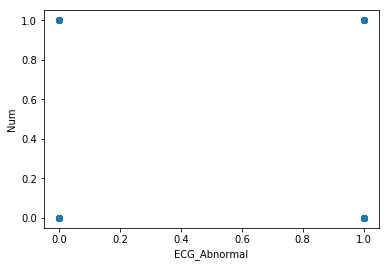

In [59]:
# Plot data - This plot assures us that there are Num values of 0 and 1 for each feature in X
# Manually substituted each X feature
sns.regplot(x=dfC['ECG_Abnormal'], y=dfC['Num'], data=dfC, fit_reg=False)

### Fitting Models Individually
Running a GridSearch resulted in code that runs endlessly, so first I fit the models separately and determine where the problems are.  Then below I can run a GridSearch without the parameters that cause problems.

In [60]:
# Divide data into training and testing sets
# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [61]:
# Standardize the features
# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

#### Support Vector Machine

In [62]:
# The list of value for hyperparameter C (penalty parameter)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# The list of choices for hyperparameter kernel
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['rbf']
# Only rbf produces any output, and I still get warnings about convergence.  
# SVM is the primary reason the GridSearch got stuck.

# The list of choices for hyperparameter gamma
gammas = [0.01, 0.1, 1, 10, 100]

# The list of [score, setting], where score is the score of the classifier and setting a pair of (C, kernel)
score_settings = []

# For each C
for C in Cs:
    # For each kernel
    for kernel in kernels:
        # For each gamma
        for gamma in gammas:
            # Declare the classifier with hyperparameter C, kernel, gamma, random_state, and max iterations
            clf1 = SVC(C=C, kernel=kernel, gamma=gamma, random_state=0, max_iter=100)

            # Fit the classifier
            clf1.fit(X_train, y_train)

            # Get the score (rounding to two decimal places)
            score = round(clf1.score(X_test, y_test), 2)
        
            # Get the setting, which is (C, kernel, gamma)
            setting = [C, kernel, gamma]

            # Append [score, setting] to score_settings
            score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('kernel: ' + score_settings[0][1][1])
print('gamma: ' + str(score_settings[0][1][2]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

The list of [score, setting] is:
[0.73, [0.1, 'rbf', 0.1]]
[0.67, [0.1, 'rbf', 1]]
[0.66, [0.0001, 'rbf', 1]]
[0.66, [0.001, 'rbf', 1]]
[0.66, [1, 'rbf', 1]]
[0.65, [0.0001, 'rbf', 10]]
[0.64, [0.01, 'rbf', 100]]
[0.64, [1, 'rbf', 0.01]]
[0.63, [0.001, 'rbf', 100]]
[0.63, [0.1, 'rbf', 100]]
[0.63, [1, 'rbf', 100]]
[0.63, [10, 'rbf', 1]]
[0.63, [10, 'rbf', 10]]
[0.62, [0.0001, 'rbf', 100]]
[0.62, [0.1, 'rbf', 10]]
[0.62, [1, 'rbf', 10]]
[0.61, [0.0001, 'rbf', 0.1]]
[0.61, [0.001, 'rbf', 0.1]]
[0.61, [0.001, 'rbf', 10]]
[0.61, [0.01, 'rbf', 0.1]]
[0.6, [0.01, 'rbf', 10]]
[0.6, [1, 'rbf', 0.1]]
[0.54, [0.01, 'rbf', 1]]
[0.51, [0.0001, 'rbf', 0.01]]
[0.51, [0.001, 'rbf', 0.01]]
[0.51, [0.01, 'rbf', 0.01]]
[0.51, [0.1, 'rbf', 0.01]]
[0.51, [10, 'rbf', 0.1]]
[0.44, [10, 'rbf', 100]]
[0.4, [10, 'rbf', 0.01]]

The best setting is:
C: 0.1
kernel: rbf
gamma: 0.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

In [63]:
# Produce confusion matrix for highest ranked model
clf1 = SVC(C=0.1, kernel='rbf', gamma=0.1, random_state=0, max_iter=100)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([[74, 34],
       [15, 59]], dtype=int64)

In [64]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
print(precision)

# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
print(recall)

0.6344086021505376
0.7972972972972973


In [65]:
pd.Series(y_test).value_counts()

0    108
1     74
dtype: int64

In [66]:
pd.Series(y_pred).value_counts()

1    93
0    89
dtype: int64

Discussion:  This SVM model fails to converge.  Even if we use the non-converged model, it predicts y=0 more often than it should.  It fails to label 1 as 1 and 0 as 0 about a third of the time.  It isn't a good model.

#### Logistic Regression

In [67]:
# The list of value for hyperparameter C (penalty parameter)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# The list of choices for hyperparameter solver
#solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Note:  Sag and Saga are good optimizers for large data sets, but they performed badly on this small dataset because they could not converge.
solvers = ['newton-cg', 'lbfgs', 'liblinear']

# The list of [score, setting]
score_settings = []

# For each C
for C in Cs:
    # For each solver
    for solver in solvers:
        # Declare the classifier with hyperparameter C, solver, and random_state
        clf2 = LogisticRegression(C=C, solver=solver, random_state=0)

        # Fit the classifier
        clf2.fit(X_train, y_train)

        # Get the score (rounding to two decimal places)
        score = round(clf2.score(X_test, y_test), 2)
        
        # Get the setting, which is a pair of (C, solver)
        setting = [C, solver]

        # Append [score, setting] to score_settings
        score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('solver: ' + score_settings[0][1][1])

The list of [score, setting] is:
[0.7, [0.0001, 'liblinear']]
[0.7, [0.1, 'newton-cg']]
[0.7, [0.1, 'lbfgs']]
[0.69, [0.001, 'liblinear']]
[0.69, [0.01, 'newton-cg']]
[0.69, [0.01, 'lbfgs']]
[0.69, [0.01, 'liblinear']]
[0.69, [0.1, 'liblinear']]
[0.69, [1, 'newton-cg']]
[0.69, [1, 'lbfgs']]
[0.69, [1, 'liblinear']]
[0.69, [10, 'newton-cg']]
[0.69, [10, 'lbfgs']]
[0.69, [10, 'liblinear']]
[0.69, [100, 'newton-cg']]
[0.69, [100, 'lbfgs']]
[0.69, [100, 'liblinear']]
[0.69, [1000, 'newton-cg']]
[0.69, [1000, 'lbfgs']]
[0.69, [1000, 'liblinear']]
[0.69, [10000, 'newton-cg']]
[0.69, [10000, 'lbfgs']]
[0.69, [10000, 'liblinear']]
[0.59, [0.0001, 'newton-cg']]
[0.59, [0.0001, 'lbfgs']]
[0.59, [0.001, 'newton-cg']]
[0.59, [0.001, 'lbfgs']]

The best setting is:
C: 0.0001
solver: liblinear


In [68]:
# Produce confusion matrix for highest ranked model
clf2 = LogisticRegression(C=0.0001, solver='liblinear', random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[81, 27],
       [28, 46]], dtype=int64)

In [69]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
print(precision)

# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
print(recall)

0.6301369863013698
0.6216216216216216


In [70]:
pd.Series(y_test).value_counts()

0    108
1     74
dtype: int64

In [71]:
pd.Series(y_pred).value_counts()

0    109
1     73
dtype: int64

Discussion:  This logistic regression model predicts almost exactly the right number of y=0 and y=1, but it fails to correctly label 1 as 1 or 0 as 0 about one third of the time.

#### Multilayer Perceptron

In [72]:
# The list of sizes for hidden layers
HLs = [10, 100, 200]

# The list of choices for the activation
activations = ['identity', 'logistic', 'tanh', 'relu']

# The list of [score, setting]
score_settings = []

# For each size
for size in HLs:
    # For each activation
    for activation in activations:
        # Declare the classifier with hyperparameter hidden layer size, activation, random_state, and solver
        # Per sklearn documentation, for a small dataset, lbfgs is a better solver than the default, which was failing to converge
        clf3 = MLPClassifier(hidden_layer_sizes=size, activation=activation, random_state=0, solver='lbfgs')

        # Fit the classifier
        clf3.fit(X_train, y_train)

        # Get the score (rounding to two decimal places)
        score = round(clf3.score(X_test, y_test), 2)
        
        # Get the setting, which is a pair of (size, activation)
        setting = [size, activation]

        # Append [score, setting] to score_settings
        score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('HL size: ' + str(score_settings[0][1][0]))
print('activation: ' + score_settings[0][1][1])

The list of [score, setting] is:
[0.73, [10, 'logistic']]
[0.7, [100, 'logistic']]
[0.69, [10, 'identity']]
[0.69, [10, 'relu']]
[0.69, [100, 'identity']]
[0.69, [100, 'tanh']]
[0.69, [200, 'identity']]
[0.65, [200, 'tanh']]
[0.65, [200, 'relu']]
[0.61, [200, 'logistic']]
[0.6, [100, 'relu']]
[0.58, [10, 'tanh']]

The best setting is:
HL size: 10
activation: logistic


In [73]:
# Produce confusion matrix for highest ranked model
clf3 = MLPClassifier(hidden_layer_sizes=10, activation='logistic', random_state=0, solver='lbfgs')
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[83, 25],
       [25, 49]], dtype=int64)

In [74]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
print(precision)

# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
print(recall)

0.6621621621621622
0.6621621621621622


In [75]:
pd.Series(y_test).value_counts()

0    108
1     74
dtype: int64

In [76]:
pd.Series(y_pred).value_counts()

0    108
1     74
dtype: int64

Discussion:  This multilayer perceptron model predicts exactly the right number of y=0 and y=1, but it fails to correctly label 1 as 1 or 0 as 0 about one third of the time.

#### Decision Tree

In [77]:
# The list of minimum samples split
splits = [5, 10, 20, 30]

# The list minimum samples leaves
leaves = [1, 10, 20, 30]

# The list of [score, setting]
score_settings = []

# For each split
for split in splits:
    # For each leaf
    for leaf in leaves:
        # Declare the classifier with minimum splits, minimum leaves, and random_state
        clf4 = DecisionTreeClassifier(min_samples_split=split, min_samples_leaf=leaf, random_state=0)

        # Fit the classifier
        clf4.fit(X_train, y_train)

        # Get the score (rounding to two decimal places)
        score = round(clf4.score(X_test, y_test), 2)
        
        # Get the setting, which is a pair of (split, leaf)
        setting = [split, leaf]

        # Append [score, setting] to score_settings
        score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('split: ' + str(score_settings[0][1][0]))
print('leaf: ' + str(score_settings[0][1][1]))

The list of [score, setting] is:
[0.73, [5, 30]]
[0.73, [10, 30]]
[0.73, [20, 30]]
[0.73, [30, 30]]
[0.71, [5, 10]]
[0.71, [10, 10]]
[0.71, [20, 10]]
[0.7, [5, 20]]
[0.7, [10, 20]]
[0.7, [20, 20]]
[0.7, [30, 10]]
[0.7, [30, 20]]
[0.66, [20, 1]]
[0.65, [10, 1]]
[0.64, [30, 1]]
[0.61, [5, 1]]

The best setting is:
split: 5
leaf: 30


In [78]:
# Produce confusion matrix for highest ranked model
#clf4 = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=30, random_state=0)
clf4 = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=20, random_state=0)
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[81, 27],
       [27, 47]], dtype=int64)

In [79]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
print(precision)

# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
print(recall)

0.6351351351351351
0.6351351351351351


In [80]:
pd.Series(y_test).value_counts()

0    108
1     74
dtype: int64

In [81]:
pd.Series(y_pred).value_counts()

0    108
1     74
dtype: int64

Discussion:  This decision tree model predicts close to the right number of y=0 and y=1, tending to classify samples as y=0, but it fails to correctly label 1 as 1 or 0 as 0 about one third of the time.

#### Random Forest

In [82]:
# The list of number of trees
trees = [2, 10, 20, 30]

# The list of minimum samples split
splits = [2, 10, 20, 30]

# The list minimum samples leaves
leaves = [1, 10, 20, 30]

# The list of [score, setting]
score_settings = []

# For for each tree
for tree in trees:
    # For each split
    for split in splits:
        # For each leaf
        for leaf in leaves:
            # Declare the classifier with number of trees, minimum splits, minimum leaves, and random_state
            clf5 = RandomForestClassifier(n_estimators=tree, min_samples_split=split, min_samples_leaf=leaf, random_state=0)

            # Fit the classifier
            clf5.fit(X_train, y_train)

            # Get the score (rounding to two decimal places)
            score = round(clf5.score(X_test, y_test), 2)
        
            # Get the setting, which is (tree, split, leaf)
            setting = [tree, split, leaf]

            # Append [score, setting] to score_settings
            score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('trees: ' + str(score_settings[0][1][0]))
print('split: ' + str(score_settings[0][1][1]))
print('leaf: ' + str(score_settings[0][1][2]))

The list of [score, setting] is:
[0.76, [10, 2, 10]]
[0.76, [10, 10, 10]]
[0.76, [10, 20, 10]]
[0.75, [10, 20, 1]]
[0.75, [20, 20, 1]]
[0.75, [20, 30, 10]]
[0.74, [10, 2, 20]]
[0.74, [10, 10, 20]]
[0.74, [10, 20, 20]]
[0.74, [10, 30, 10]]
[0.74, [10, 30, 20]]
[0.74, [20, 2, 10]]
[0.74, [20, 2, 30]]
[0.74, [20, 10, 10]]
[0.74, [20, 10, 30]]
[0.74, [20, 20, 10]]
[0.74, [20, 20, 30]]
[0.74, [20, 30, 1]]
[0.74, [20, 30, 30]]
[0.74, [30, 2, 10]]
[0.74, [30, 2, 30]]
[0.74, [30, 10, 1]]
[0.74, [30, 10, 10]]
[0.74, [30, 10, 30]]
[0.74, [30, 20, 1]]
[0.74, [30, 20, 10]]
[0.74, [30, 20, 30]]
[0.74, [30, 30, 10]]
[0.74, [30, 30, 30]]
[0.73, [10, 2, 30]]
[0.73, [10, 10, 30]]
[0.73, [10, 20, 30]]
[0.73, [10, 30, 1]]
[0.73, [10, 30, 30]]
[0.73, [20, 2, 20]]
[0.73, [20, 10, 1]]
[0.73, [20, 10, 20]]
[0.73, [20, 20, 20]]
[0.73, [20, 30, 20]]
[0.73, [30, 30, 1]]
[0.72, [2, 30, 10]]
[0.72, [10, 10, 1]]
[0.72, [30, 2, 20]]
[0.72, [30, 10, 20]]
[0.72, [30, 20, 20]]
[0.72, [30, 30, 20]]
[0.71, [2, 2, 20]]
[

In [83]:
# Produce confusion matrix for highest ranked model
clf5 = RandomForestClassifier(n_estimators=10, min_samples_split=2, min_samples_leaf=10, random_state=0)
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[87, 21],
       [23, 51]], dtype=int64)

In [84]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
print(precision)

# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
print(recall)

0.7083333333333334
0.6891891891891891


In [85]:
pd.Series(y_test).value_counts()

0    108
1     74
dtype: int64

In [86]:
pd.Series(y_pred).value_counts()

0    110
1     72
dtype: int64

Discussion:  This random forest model predicts close to the right number of y=0 and y=1, but it fails to correctly label 1 as 1 or 0 as 0 about 30% of the time.  It is the best model so far, but not great.

### Pipeline and GridSearch
Used for hyperparameter tuning and model selection.  
Code modified from Proffesor Yuxiao Huang

In [87]:
# Dictionary of classifiers
clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0)}

In [88]:
# Dictionaory of pipeline
pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [89]:
# Dictionary of parameter grids
param_grids = {}

In [90]:
# Parameter grid for logistic regression
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'clf__C': C_range},
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

In [91]:
# Parameter grid for multilayer perceptron
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
               'clf__solver': ['lbfgs']}]

param_grids['mlp'] = param_grid

In [92]:
# Parameter grid for decision tree
param_grid = [{'clf__min_samples_split': [5, 10, 20, 30],
               'clf__min_samples_leaf': [1, 10, 20, 30]}]

param_grids['dt'] = param_grid

In [93]:
# Parameter grid for random forest
param_grid = [{'clf__n_estimators': [2, 10, 20, 30],
               'clf__min_samples_split': [2, 10, 20, 30],
               'clf__min_samples_leaf': [1, 10, 20, 30]}]

param_grids['rf'] = param_grid

In [94]:
# Parameter grid for support vector machine
param_grid = [{'clf__C': [0.001, 0.01, 0.1, 1, 10],
               'clf__gamma': [0.001, 0.01, 0.1, 1, 10],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'clf__max_iter': [100]}]

param_grids['svc'] = param_grid

In [95]:
# Hyperparameter tuning

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=1,
                      cv=StratifiedKFold(n_splits=5,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [96]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.735224586288416, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 2}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.7210401891252955, {'clf__C': 0.01, 'clf__multi_class': 'ovr', 'clf__solver': 'liblinear'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.7139479905437353, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 30}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.7115839243498818, {'clf__activation': 'identity', 'clf__hidden_layer_sizes': 10, 'clf__solver': 'lbfgs'}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]



In [97]:
y_pred = best_score_param_estimators[0][2].predict(X_test)

confusion_matrix(y_test, y_pred)

array([[82, 26],
       [28, 46]], dtype=int64)

In [98]:
# Precision - Does the model label positive as positive and negative as negative?
precision = precision_score(y_test, y_pred)
precision

0.6388888888888888

In [99]:
# Recall - Does the model find all positive samples?
recall = recall_score(y_test, y_pred)
recall

0.6216216216216216

### Ideas for Model Improvement

Discussion:  As above when Random Forest was run separately, the precision and recall are around 2/3, and accuracy is about 74%.  More worrisome, the SVM model did not work at all.  Why might these models not work well or at all?  One reason may be that the data are skewed.  Normalizing the data will not correct skewed data.  The plots below show that some of the data are skewed.  We might need to transform the data to get more accurate models, but those techniques are beyond the scope of this project.

#### Plot the Variables

In [100]:
target_0 = dfC.loc[dfC['Num']==0]
target_1 = dfC.loc[dfC['Num']==1]

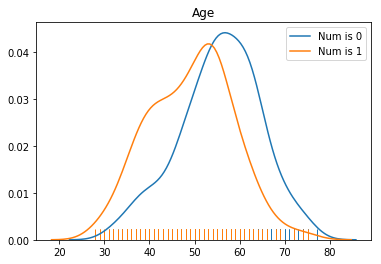

In [101]:
sns.distplot(target_0[['Age']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['Age']], hist=False, rug=True, label='Num is 1')

plt.title('Age')
plt.legend()
plt.show()

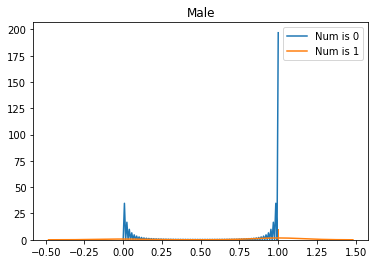

In [102]:
sns.distplot(target_0[['Male']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['Male']], hist=False, rug=True, label='Num is 1')

plt.title('Male')
plt.legend()
plt.show()

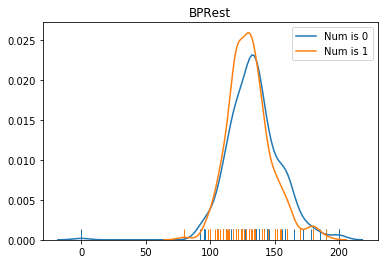

In [103]:
sns.distplot(target_0[['BPRest']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['BPRest']], hist=False, rug=True, label='Num is 1')

plt.title('BPRest')
plt.legend()
plt.show()

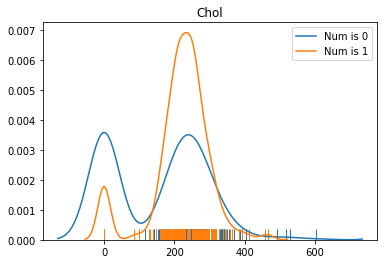

In [104]:
sns.distplot(target_0[['Chol']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['Chol']], hist=False, rug=True, label='Num is 1')

plt.title('Chol')
plt.legend()
plt.show()

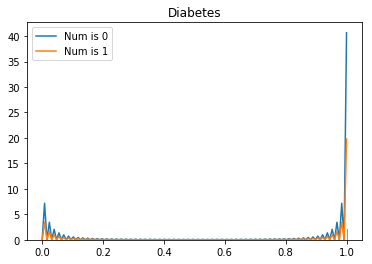

In [105]:
sns.distplot(target_0[['Diabetes']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['Diabetes']], hist=False, rug=True, label='Num is 1')

plt.title('Diabetes')
plt.legend()
plt.show()

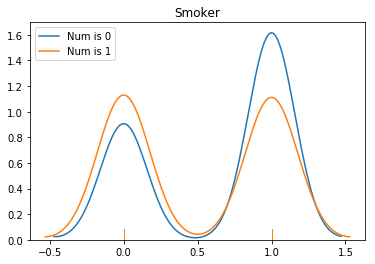

In [106]:
sns.distplot(target_0[['Smoker']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['Smoker']], hist=False, rug=True, label='Num is 1')

plt.title('Smoker')
plt.legend()
plt.show()

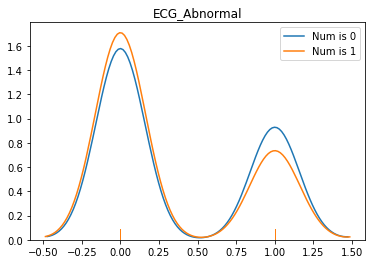

In [107]:
sns.distplot(target_0[['ECG_Abnormal']], hist=False, rug=True, label='Num is 0')
sns.distplot(target_1[['ECG_Abnormal']], hist=False, rug=True, label='Num is 1')

plt.title('ECG_Abnormal')
plt.legend()
plt.show()